#Take data

In [1]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
   place_code = "Running in Colab"
   print(place_code)
   from google.colab import drive
   drive.mount('/content/drive')
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/Пресня/AI-Хакатон_2023_Яндекс.Маркет')

else:
  place_code = "NOT in Colab"
  print(place_code)

HOME = os.getcwd()
print(HOME)

Running in Colab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/Пресня/AI-Хакатон_2023_Яндекс.Маркет


In [2]:
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
d = {'all':[]}
with open(HOME + '/pictures_market') as infile:
    for line in infile:
        result = json.loads(line)
        d['all'].append(result)

full_df = pd.DataFrame(d['all'])
full_df

,market_sku_id,pic_url,verdict
0,1402035435,//avatars.mds.yandex.net/get-marketpic/7044394...,clean_photo_good_background
1,1402035435,//avatars.mds.yandex.net/get-marketpic/5620596...,clean_photo_good_background
2,1402035435,//avatars.mds.yandex.net/get-marketpic/1708436...,other_infographics
3,729239006,//avatars.mds.yandex.net/get-marketpic/1897710...,clean_photo_good_background
4,429050296,//avatars.mds.yandex.net/get-marketpic/8786714...,good_infographics
...,...,...,...
1131827,100818966350,//avatars.mds.yandex.net/get-marketpic/1697981...,clean_photo_good_background
1131828,100972165930,//avatars.mds.yandex.net/get-marketpic/1582458...,clean_photo_good_background
1131829,101815744136,//avatars.mds.yandex.net/get-marketpic/7067214...,good_infographics
1131830,101603206373,//avatars.mds.yandex.net/get-marketpic/1338103...,good_infographics


In [4]:
vers = full_df['verdict'].value_counts().index.to_numpy()
print(f'Все классы - {vers}')
print()
infogrf = [1, 2, 3] # ('good_infographics', 'other_infographics', 'bad_infographics')
not_infogrf = [0, 5, 6] #('clean_photo_good_background','clean_photo_bad_background', 'clean_photo_image_background')

print(f'Классы с инфографикой - {vers[infogrf]}')
print(f'Классы без инфографики - {vers[not_infogrf]}')

Все классы - ['clean_photo_good_background' 'good_infographics' 'other_infographics'
 'bad_infographics' 'clean_photo_other_background'
 'clean_photo_bad_background' 'clean_photo_image_background']

Классы с инфографикой - ['good_infographics' 'other_infographics' 'bad_infographics']
Классы без инфографики - ['clean_photo_good_background' 'clean_photo_bad_background'
 'clean_photo_image_background']


In [5]:
test_values = list(vers[infogrf]) + list(vers[not_infogrf])
test_keys = np.arange(len(test_values))

# словарь классов
dict_catagory = dict(zip(test_keys, test_values))
dict_catagory

{0: 'good_infographics',
 1: 'other_infographics',
 2: 'bad_infographics',
 3: 'clean_photo_good_background',
 4: 'clean_photo_bad_background',
 5: 'clean_photo_image_background'}

In [6]:
def getKey(dct,value):
     return [key for key in dct if (dct[key] == value)]

take_verdict = list(dict_catagory.values())
qty = 500
random_state = 88
print(f'Берем по {qty} примеров из {take_verdict} с инфографикой')
print()
train_df = pd.concat([full_df[full_df.verdict.isin(take_verdict)][full_df.verdict == name].sample(qty,
                                                                               random_state = random_state) for name in take_verdict])
train_df.reset_index(drop= True , inplace= True )
train_df['label'] = train_df.verdict.apply(lambda x: getKey(dict_catagory, x)[0])
train_df

Берем по 500 примеров из ['good_infographics', 'other_infographics', 'bad_infographics', 'clean_photo_good_background', 'clean_photo_bad_background', 'clean_photo_image_background'] с инфографикой



,market_sku_id,pic_url,verdict,label
0,101788208097,//avatars.mds.yandex.net/get-marketpic/7021042...,good_infographics,0
1,101274140769,//avatars.mds.yandex.net/get-marketpic/4741814...,good_infographics,0
2,101914467837,//avatars.mds.yandex.net/get-marketpic/8090201...,good_infographics,0
3,100885552947,//avatars.mds.yandex.net/get-marketpic/1648150...,good_infographics,0
4,101089348882,//avatars.mds.yandex.net/get-marketpic/8770371...,good_infographics,0
...,...,...,...,...
2995,101907145937,//avatars.mds.yandex.net/get-marketpic/8426904...,clean_photo_image_background,5
2996,101983096788,//avatars.mds.yandex.net/get-marketpic/1656177...,clean_photo_image_background,5
2997,101836737778,//avatars.mds.yandex.net/get-marketpic/5417610...,clean_photo_image_background,5
2998,101392428924,//avatars.mds.yandex.net/get-marketpic/5101693...,clean_photo_image_background,5


## Splite Data to train

In [7]:
from sklearn.model_selection import train_test_split
df_train, df_val  = train_test_split(train_df[['pic_url', 'label']],
                                                     stratify=train_df.label.values,
                                                    train_size=0.8,
                                                    random_state=42)


In [8]:
df_train.reset_index(drop=True, inplace=True)
df_train

,pic_url,label
0,//avatars.mds.yandex.net/get-marketpic/1041839...,3
1,//avatars.mds.yandex.net/get-marketpic/1596597...,0
2,//avatars.mds.yandex.net/get-marketpic/1648217...,0
3,//avatars.mds.yandex.net/get-marketpic/6727891...,4
4,//avatars.mds.yandex.net/get-marketpic/1855445...,0
...,...,...
2395,//avatars.mds.yandex.net/get-marketpic/8604689...,4
2396,//avatars.mds.yandex.net/get-marketpic/1712983...,5
2397,//avatars.mds.yandex.net/get-marketpic/1885518...,2
2398,//avatars.mds.yandex.net/get-marketpic/1913857...,4


In [9]:
df_val.reset_index(drop=True, inplace=True)
df_val

,pic_url,label
0,//avatars.mds.yandex.net/get-marketpic/5455388...,1
1,//avatars.mds.yandex.net/get-marketpic/1591757...,4
2,//avatars.mds.yandex.net/get-marketpic/1703670...,0
3,//avatars.mds.yandex.net/get-marketpic/6208653...,4
4,//avatars.mds.yandex.net/get-marketpic/1860917...,4
...,...,...
595,//avatars.mds.yandex.net/get-marketpic/7229295...,5
596,//avatars.mds.yandex.net/get-marketpic/6045526...,0
597,//avatars.mds.yandex.net/get-marketpic/8608310...,0
598,//avatars.mds.yandex.net/get-marketpic/246300/...,2


In [10]:
NUM_CLASSES = len(np.unique(df_val.label))
NUM_CLASSES

6

## Identify Broken Link

В этом блоке отбираем рабочие лнки по классам для train и val для подмены в обучении и валидациию


У нас будет постоянно происходить еще аугментация, так что обучение при подмене тоже будет

In [11]:
if os.getenv("COLAB_RELEASE_TAG"):
   place_code = "Running in Colab"
   print(place_code)
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF')

else:
  place_code = "NOT in Colab"
  os.chdir('/Final_TF')
  print(place_code)

HOME = os.getcwd()
print(HOME)

Running in Colab
/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF


In [12]:
from Get_data import identifyBrokenLinks,  take_goodLinks, get_data

In [13]:
train_bad_links = identifyBrokenLinks(df_train.pic_url.values[:100])

train_goodlinks_dict = dict()
for i in range(NUM_CLASSES):
  df_ = df_train[df_train.label == i]
  train_goodlinks_dict[i] = take_goodLinks(df_.pic_url.values, train_bad_links, 15)

Checking external link # 0  out of  100 .
Checking external link # 1  out of  100 .
Checking external link # 2  out of  100 .
Checking external link # 3  out of  100 .
Checking external link # 4  out of  100 .
Checking external link # 5  out of  100 .
Checking external link # 6  out of  100 .
Checking external link # 7  out of  100 .
Checking external link # 8  out of  100 .
Checking external link # 9  out of  100 .
Checking external link # 10  out of  100 .
Checking external link # 11  out of  100 .
Checking external link # 12  out of  100 .
Checking external link # 13  out of  100 .
Checking external link # 14  out of  100 .
Checking external link # 15  out of  100 .
Checking external link # 16  out of  100 .
Checking external link # 17  out of  100 .
Checking external link # 18  out of  100 .
Checking external link # 19  out of  100 .
Checking external link # 20  out of  100 .
Checking external link # 21  out of  100 .
Checking external link # 22  out of  100 .
Checking external lin

In [14]:
val_bad_links = identifyBrokenLinks(df_val.pic_url.values[:100])

val_goodlinks_dict = dict()
for i in range(NUM_CLASSES):
  df_ = df_val[df_val.label == i]
  val_goodlinks_dict[i] = take_goodLinks(df_.pic_url.values, val_bad_links, 15)

Checking external link # 0  out of  100 .
Checking external link # 1  out of  100 .
Checking external link # 2  out of  100 .
Checking external link # 3  out of  100 .
Checking external link # 4  out of  100 .
Checking external link # 5  out of  100 .
Checking external link # 6  out of  100 .
Checking external link # 7  out of  100 .
Checking external link # 8  out of  100 .
Checking external link # 9  out of  100 .
Checking external link # 10  out of  100 .
Checking external link # 11  out of  100 .
Checking external link # 12  out of  100 .
Checking external link # 13  out of  100 .
Checking external link # 14  out of  100 .
Checking external link # 15  out of  100 .
Checking external link # 16  out of  100 .
Checking external link # 17  out of  100 .
Checking external link # 18  out of  100 .
Checking external link # 19  out of  100 .
Checking external link # 20  out of  100 .
Checking external link # 21  out of  100 .
Checking external link # 22  out of  100 .
Checking external lin

In [15]:
train_goodlinks_dict[3]

['https://avatars.mds.yandex.net/get-marketpic/1041839/pic9f18adf1521c26e3912eee2df30a3b1a/orig',
 'https://avatars.mds.yandex.net/get-marketpic/5476798/picf6da3a7e4c0e6845bb6ce779d00aa1b7/orig',
 'https://avatars.mds.yandex.net/get-marketpic/9150913/pic7f41b18b990d2715eba6cbdc0a71fa75/orig',
 'https://avatars.mds.yandex.net/get-marketpic/4872461/picebc1f3e14c4d2a29e43950b44565b8ab/orig',
 'https://avatars.mds.yandex.net/get-marketpic/1545910/pica2e8af7b593c15226d54a437ea959e1b/orig',
 'https://avatars.mds.yandex.net/get-marketpic/8094350/pic8cf2d23532e89e29b34b468b09d75e36/orig',
 'https://avatars.mds.yandex.net/get-marketpic/5859723/pic535e0da33e1347e6b7aff84a63a7bfbc/orig',
 'https://avatars.mds.yandex.net/get-marketpic/4984007/picce177f733e71fdd3eedf620acea6ed9b/orig',
 'https://avatars.mds.yandex.net/get-marketpic/6887647/picf7f2ccf587a134d9127c5c37719a110f/orig',
 'https://avatars.mds.yandex.net/get-marketpic/1582807/pica287a7c786dee753d14c897894cc2f7b/orig',
 'https://avatars.md

In [16]:
val_goodlinks_dict[2]

['https://avatars.mds.yandex.net/get-marketpic/5928197/pic31503b5435df52efa21db8e849aff1af/orig',
 'https://avatars.mds.yandex.net/get-marketpic/6446039/pic506c94460498e535b344ed853817450f/orig',
 'https://avatars.mds.yandex.net/get-marketpic/1847688/pic8de850bb4aefe5580465eb1eacc284ee/orig',
 'https://avatars.mds.yandex.net/get-marketpic/1855214/pic1277ff0ca3926b03ef32715a27e5e435/orig',
 'https://avatars.mds.yandex.net/get-marketpic/1573229/pic25558a4c54cf22f69d8e944551ed7eec/orig',
 'https://avatars.mds.yandex.net/get-marketpic/5515263/pic7e25d77fbeac76414bbc2d022c6bc21c/orig',
 'https://avatars.mds.yandex.net/get-marketpic/7702550/pic01104c934141e97dee73e13116bd0532/orig',
 'https://avatars.mds.yandex.net/get-marketpic/8542058/picdd4a4e902eb2dd9ca7f2961feae95c0d/orig',
 'https://avatars.mds.yandex.net/get-marketpic/8648850/pice42cf8b4a30d5c78a5dfd4e139e1684e/orig',
 'https://avatars.mds.yandex.net/get-marketpic/1426045/pic14b0a1f21212e2e93ec879557fd6f079/orig',
 'https://avatars.md

## Data с аугментацей

In [17]:
from Data_preprocessing import agumager

In [18]:
idx = np.random.randint(0, df_val.shape[0], 7)
W, H =  256, 256
images, labels = get_data(urls = df_val.loc[idx].pic_url,
                     labels = df_val.loc[idx].label,
                     resize2 = (W, H),
                     good_links= val_goodlinks_dict,
                     )

print(labels)
print()
print(dict_catagory)

not load //avatars.mds.yandex.net/get-marketpic/364755/pic7978dfb5b8b9b0c3fd087ca56464401b/orig take random GOOD_URL
[5, 3, 2, 2, 3, 1, 4]

{0: 'good_infographics', 1: 'other_infographics', 2: 'bad_infographics', 3: 'clean_photo_good_background', 4: 'clean_photo_bad_background', 5: 'clean_photo_image_background'}


Класс 2 - bad_infographics



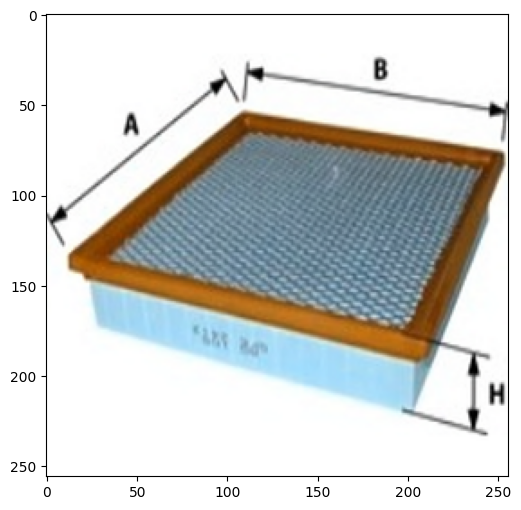

In [19]:
id = 2
print(f'Класс {labels[id]} - {dict_catagory[labels[id]]}')
print()
img = images[id]
img_bgr = np.array(img)[:, :, 2::-1]
plt.figure(figsize=(10, 6))
plt.imshow(img_bgr)
plt.show()

Мы сейчас не читаем, а детектируем, поэтому можно и вращать

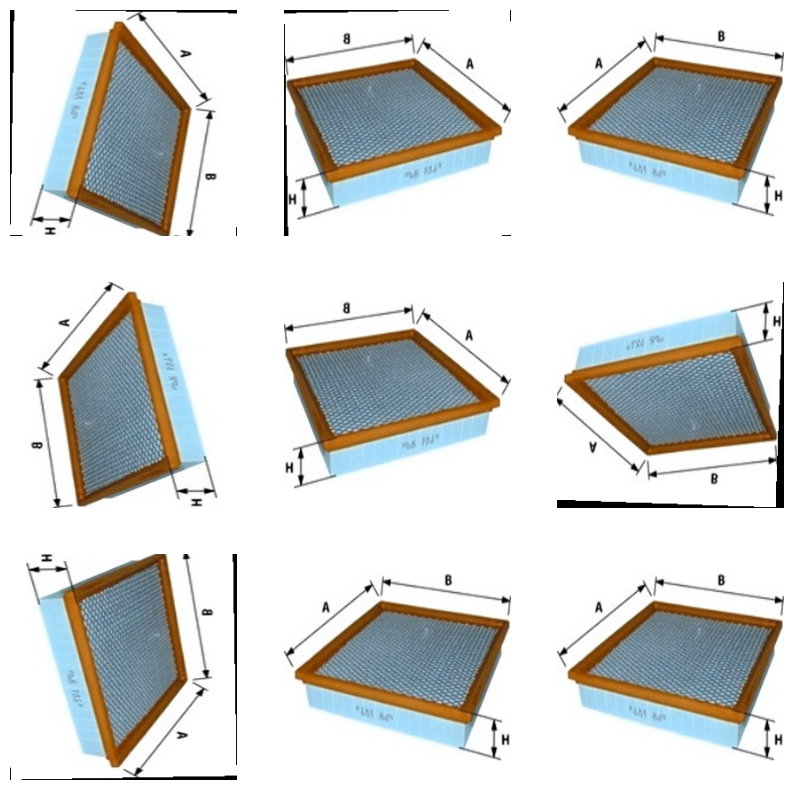

In [20]:
# Пример того, как она работает.
plt.figure(figsize=(10, 10))

for i in range(9):
    aug_imag = agumager(img_bgr)#, simple_agum=False)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(aug_imag)
    plt.axis("off")

# Model SAM

Generate Segmentation with Bounding Box

The `SamPredictor` class provides an easy interface to the model for prompting the model. It allows the user to first set an image using the `set_image` method, which calculates the necessary image embeddings. Then, prompts can be provided via the `predict` method to efficiently predict masks from those prompts. The model can take as input both point and box prompts, as well as masks from the previous iteration of prediction.

## pip

In [21]:
!pip install -q git+https://github.com/facebookresearch/segment-anything.git
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00


Загружаем веса из [репозитория Facebook Research](https://github.com/facebookresearch/segment-anything#model-checkpoints)

In [22]:
have_weights = True #False
if have_weights:
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/Пресня/AI-Хакатон_2023_Яндекс.Маркет')
else:
  %cd {HOME}
  !mkdir {HOME}/weights_sam_vit
  %cd {HOME}/weights_sam_vit
  # ViT-H
  !wget -qN https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
  #!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/weights/sam_vit_h_4b8939.pth

## Make encoder

In [23]:
import torch
from segment_anything import sam_model_registry, SamPredictor, sam_model_registry

# model_type = 'vit_h'
sam = sam_model_registry["vit_h"](checkpoint="weights_sam_vit/sam_vit_h_4b8939.pth")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam.to(device=device)

mask_predictor = SamPredictor(sam)

In [24]:
# make predict image
mask_predictor.set_image(aug_imag)
# get outputs from SAM
masks, scores, logits = mask_predictor.predict(
    multimask_output=True
)

In [25]:
masks.shape, scores, logits.shape

((3, 256, 256),
 array([0.43484592, 0.702266  , 0.79391277], dtype=float32),
 (3, 256, 256))

## SHOW mask segments

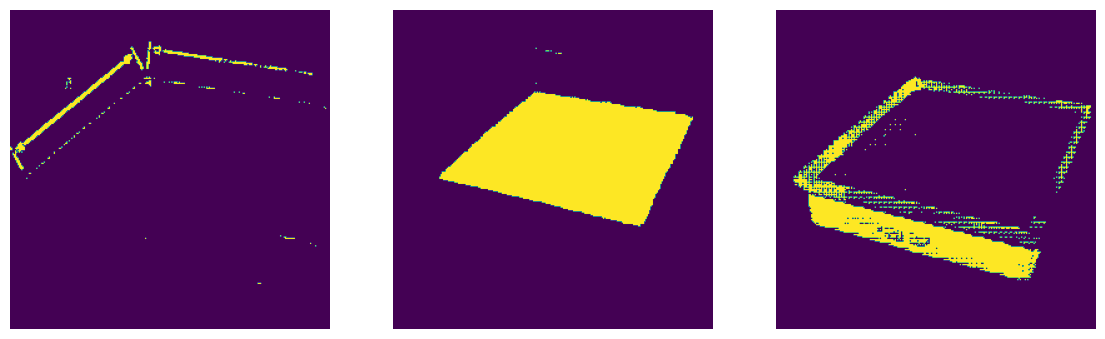

In [26]:
plt.figure(figsize=(14, 7))

for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(masks[i]*scores[i])
    plt.axis("off")
plt.show()

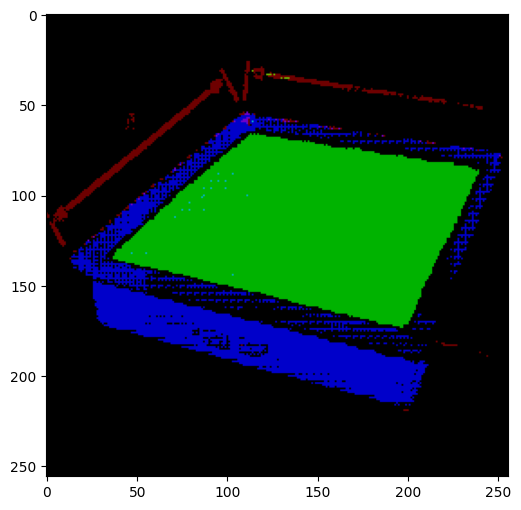

In [27]:
masks_scores = [masks[i]*scores[i] for i in range(3)]
masks_scores = np.stack(masks_scores, axis=-1)

plt.figure(figsize=(10, 6))
plt.imshow(masks_scores)
plt.show()

logits

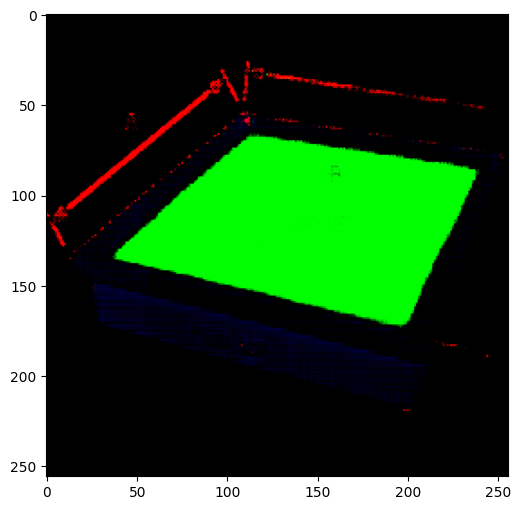

In [28]:
plt.figure(figsize=(10, 6))
plt.imshow(np.moveaxis(logits, [0], [-1]))
plt.show()

# EASYOCR
Берем данные по текстам

## pip

In [29]:
!pip install easyocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 11.3 MB/s eta 0:00:00


In [30]:
import easyocr
from Data_preprocessing import text_detect


## SHOW mask_text

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete


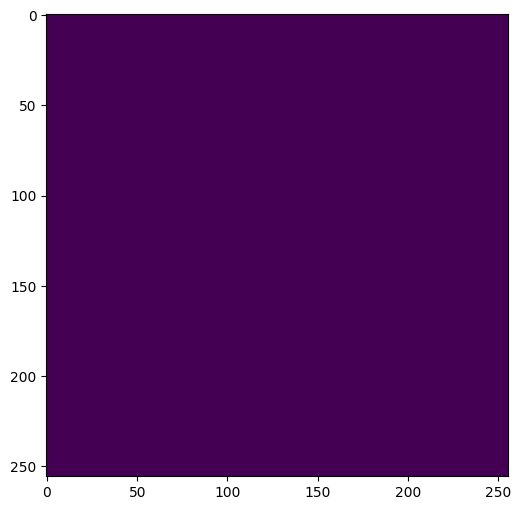

In [31]:
reader = easyocr.Reader(['ru','en'])
temp_text_box_xy = text_detect(aug_imag, reader)
print()
plt.figure(figsize=(10, 6))
plt.imshow(temp_text_box_xy)  # BGR?
plt.show()

## SHOW Interseptions segments and text

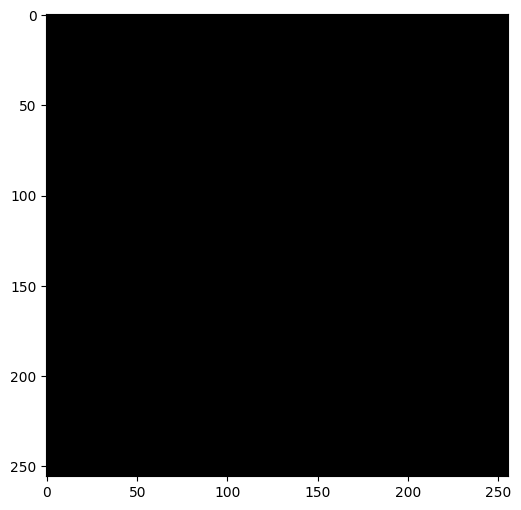

In [32]:
intsepts = [masks[i]*scores[i]*temp_text_box_xy for i in range(3)]
intsepts = np.stack(intsepts, axis=-1)

plt.figure(figsize=(10, 6))
plt.imshow(intsepts)  #
plt.show()

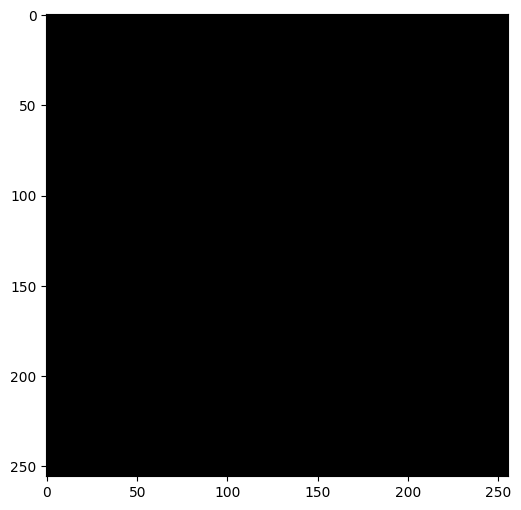

In [33]:
mask_text = temp_text_box_xy !=0
intsepts_ = [np.logical_and(mask_text, masks[i])*temp_text_box_xy*scores[i] for i in range(3)]
intsepts_ = np.stack(intsepts_, axis=-1)

plt.figure(figsize=(10, 6))
plt.imshow(intsepts_)  #
plt.show()

# Generator для Train

В обучении и валидации буде происходить случайное аугментирование данных для расширения внимания сети и ее обученя

In [34]:
from Data_preprocessing import Generator2Сlassificator

In [35]:
# создаем генераторы обучения и валидации
train_generator = Generator2Сlassificator(
                                          urls = df_train.pic_url.values,
                                          labels = df_train.label.values,
                                          take_data = get_data,
                                          good_links = train_goodlinks_dict,
                                          text_reader = reader,
                                          text_preprocess = text_detect,
                                          mask_predictor = mask_predictor,
                                          agument = agumager,
                                          recize2 = (64,64),
                                          batch_size=16
)

val_generator = Generator2Сlassificator(
                                        urls = df_val.pic_url.values,
                                        labels = df_val.label.values,
                                        take_data = get_data,
                                        good_links = val_goodlinks_dict,
                                        text_reader = reader,
                                        text_preprocess = text_detect,
                                        mask_predictor = mask_predictor,
                                        agument = agumager,
                                        recize2 = (64,64),
                                        batch_size=16
    )

In [36]:
# смотрим размерности
to_net = val_generator.__getitem__(0)
print(to_net[0][0].shape, to_net[0][1].shape, to_net[0][2].shape, to_net[1])

(16, 64, 64, 3) (16, 64, 64, 3) (16, 256, 256, 3) [1 4 0 4 4 1 5 1 2 4 2 3 1 0 0 1]


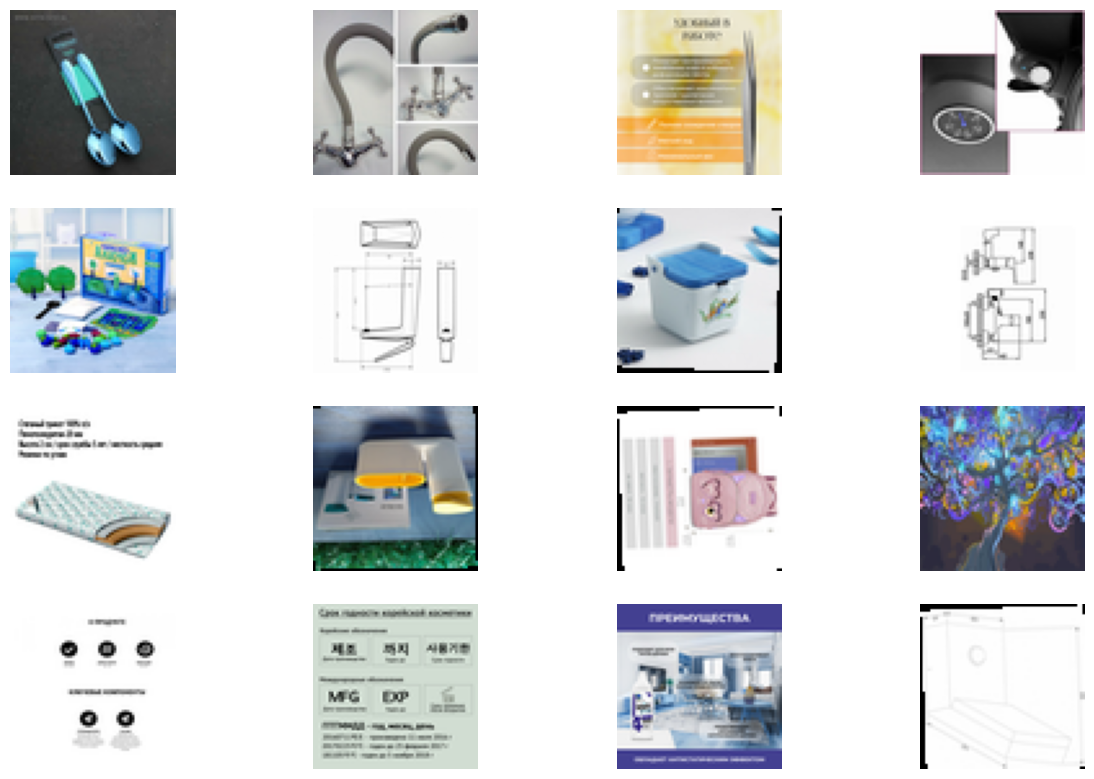

In [37]:
# look
plt.figure(figsize=(15, 15))
for i in range(to_net[0][0].shape[0]):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(to_net[0][0][i])
    plt.axis("off")

# Buld full_model

In [38]:
if os.getenv("COLAB_RELEASE_TAG"):
   place_code = "Running in Colab"
   print(place_code)
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF')

else:
  place_code = "NOT in Colab"
  os.chdir('/Final_TF')
  print(place_code)

HOME = os.getcwd()
print(HOME)

Running in Colab
/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF


In [39]:
from Model_tf import create_classmodel

In [40]:
class_model = create_classmodel(
        num_classes = NUM_CLASSES,
        img_shape = (64,64,3),
        intersept_shape = (64,64,3),
        segment_shape =(256, 256,3) ,
        levels = [16, 32, 64, 128, 256, 512, 728] ,
        out_activ = 'softmax'
)
class_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 segment_logits (InputLayer)    [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 image (InputLayer)             [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 interseptions (InputLayer)     [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 256, 256, 12  3584        ['segment_logits[0][0]']     

## Load trained model

In [41]:
if os.getenv("COLAB_RELEASE_TAG"):
   place_code = "Running in Colab"
   print(place_code)
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF')

else:
  place_code = "NOT in Colab"
  os.chdir('/Final_TF')
  print(place_code)

HOME = os.getcwd()
print(HOME)

Running in Colab
/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF


In [42]:
path_classmodel =  HOME + '/Classify_Model'
class_model = tf.keras.models.load_model(path_classmodel)
# Отображение сводки модели
class_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 segment_logits (InputLayer)    [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 image (InputLayer)             [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 interseptions (InputLayer)     [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_33 (Conv2D)             (None, 256, 256, 12  3584        ['segment_logits[0][0]']   

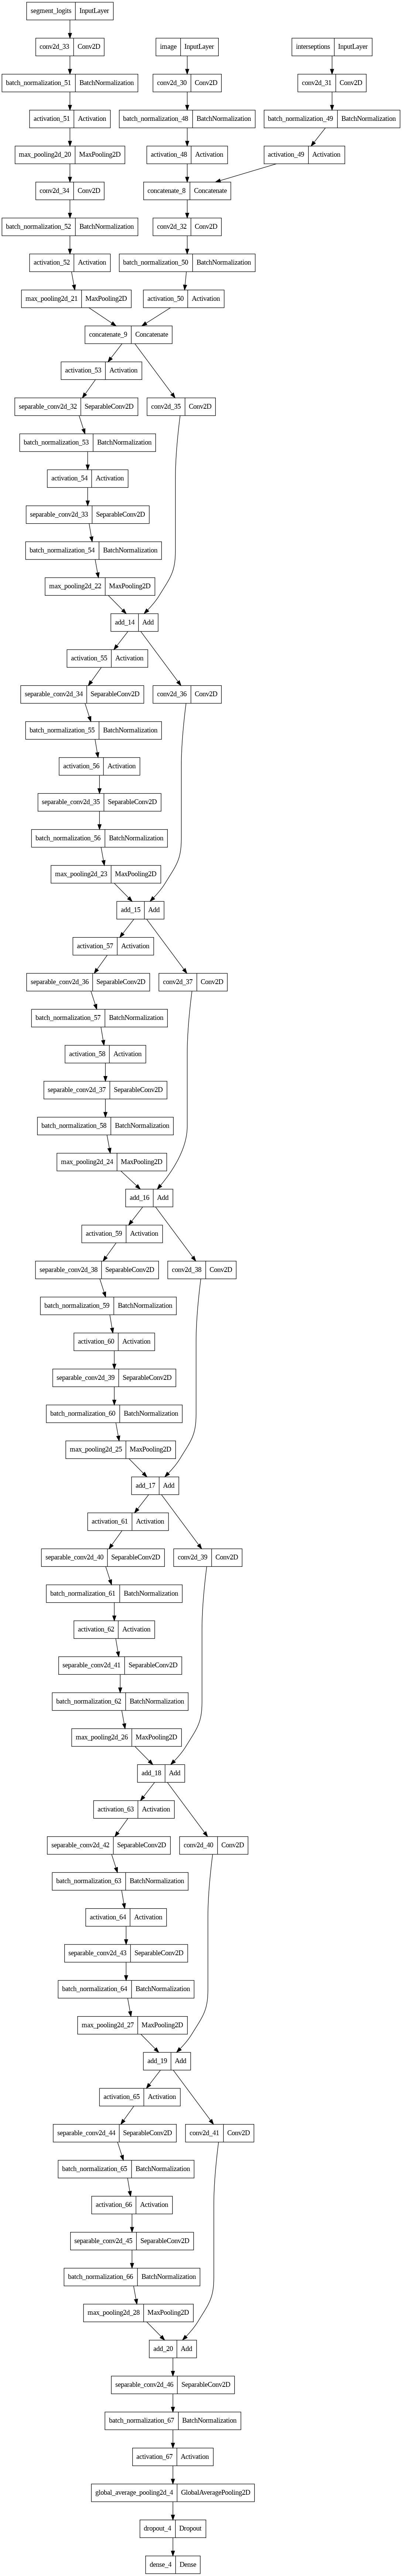

In [43]:
tf.keras.utils.plot_model(class_model)

## Train model

### Callbacks

По умолчанию `TensorFlow` отображает почти всю память графического процессора всех графических процессоров (с учетом `CUDA_VISIBLE_DEVICES`), видимых для процесса. Это сделано для более эффективного использования относительно ценных ресурсов памяти графического процессора на устройствах за счет уменьшения фрагментации памяти. Чтобы ограничить `TensorFlow` определенным набором графических процессоров, используйте метод `tf.config.set_visible_devices`.
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/gpu.ipynb?hl=da#scrollTo=ARrRhwqijPzN

In [44]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [45]:
HOME = os.getcwd()
save_path_model = HOME + '/Classify_Model'
print(save_path_model)

/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF/Final_TF/Classify_Model


In [46]:
import gc

# понижение шага
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 mode='max',
                                                 factor = 0.8,
                                                 patience = 2,
                                                 min_lr = 1e-9,
                                                 verbose = 1)

# остановка
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    verbose=1,
    patience=3,
    mode='max',
    restore_best_weights=True
    )


# Сохранение модели
checkpoint  = tf.keras.callbacks.ModelCheckpoint(
                        filepath = save_path_model,
#                       save_weights_only=True,
                        monitor='val_accuracy',
                        mode='max',
                        save_best_only=True,
                        #save_freq = 1 # каждые 1 батча
                       )

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
# очистка ОЗУ
clear_ozu = GarbageCollectorCallback()

In [47]:
import matplotlib.pyplot as plt

def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(val_loss_values) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(122)
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Start train the model

In [ ]:
epochs = 15

class_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0004),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
             tf.keras.metrics.SparseCategoricalAccuracy('accuracy',
                                                        dtype=tf.float32)
    ]
)

history = class_model.fit(
      train_generator,
      validation_data=val_generator,
      epochs=epochs,
      callbacks=[early_stopping,
                 reduce_lr,
                 checkpoint, # Если сохранять всю модель
                 clear_ozu],
      shuffle = True
)

not load //avatars.mds.yandex.net/get-marketpic/1648217/pic2fe574069953ef73b2a0949c0e3a8d75/orig take random GOOD_URL
Epoch 1/15
 11/150 [=>............................] - ETA: 1:56:04 - loss: 1.1518 - accuracy: 0.5682not load //avatars.mds.yandex.net/get-marketpic/205271/picce5934b4e38843c9a65e6a6bef1d013b/orig take random GOOD_URL
not load //avatars.mds.yandex.net/get-marketpic/1584355/pic88175bc38a0584daa23dc034529d7499/orig take random GOOD_URL
 18/150 [==>...........................] - ETA: 1:52:59 - loss: 1.2055 - accuracy: 0.5417not load //avatars.mds.yandex.net/get-marketpic/1488950/picf587f5038350a7d5f849d1b10448bf4f/orig take random GOOD_URL
not load //avatars.mds.yandex.net/get-marketpic/8963057/pic9a36e0c20c428a09b7d86dfc01a76402/orig take random GOOD_URL
not load //avatars.mds.yandex.net/get-marketpic/1864381/picef693a41a197bc52b9bfa4e66e7e24aa/orig take random GOOD_URL
 35/150 [======>.......................] - ETA: 1:39:41 - loss: 1.2059 - accuracy: 0.5482not load //avat

150/150 [==============================] - 10016s 67s/step - loss: 1.2453 - accuracy: 0.5129 - val_loss: 1.8749 - val_accuracy: 0.3700 - lr: 4.0000e-04
Epoch 2/15
 60/150 [===========>..................] - ETA: 1:19:00 - loss: 1.1582 - accuracy: 0.5594not load //avatars.mds.yandex.net/get-marketpic/8866098/piccc0851e1e702b7cef5620ab4e9b4f39a/orig take random GOOD_URL
not load //avatars.mds.yandex.net/get-marketpic/1884010/picc6a66beb1dec33dd0caccacacd811b9f/orig take random GOOD_URL
 84/150 [===============>..............] - ETA: 58:00 - loss: 1.1888 - accuracy: 0.5379not load //avatars.mds.yandex.net/get-marketpic/8786328/pic63760dfbdb3f1818359c0a122f63fc1c/orig take random GOOD_URL
not load //avatars.mds.yandex.net/get-marketpic/7759057/picbd500984217a24546568bdfcb7f9e897/orig take random GOOD_URL
 93/150 [=================>............] - ETA: 50:04 - loss: 1.1854 - accuracy: 0.5363not load //avatars.mds.yandex.net/get-marketpic/1724044/picb2107e18d17aed8aa1404ca5b992d141/orig take 

150/150 [==============================] - 9899s 66s/step - loss: 1.1480 - accuracy: 0.5512 - val_loss: 1.4023 - val_accuracy: 0.4683 - lr: 4.0000e-04
Epoch 4/15
not load //avatars.mds.yandex.net/get-marketpic/8786328/pic172719630e55c4d2571db05816305b54/orig take random GOOD_URL
  4/150 [..............................] - ETA: 2:08:57 - loss: 1.1490 - accuracy: 0.5312not load //avatars.mds.yandex.net/get-marketpic/205271/picce5934b4e38843c9a65e6a6bef1d013b/orig take random GOOD_URL
not load //avatars.mds.yandex.net/get-marketpic/1584355/pic88175bc38a0584daa23dc034529d7499/orig take random GOOD_URL
  8/150 [>.............................] - ETA: 2:05:01 - loss: 1.1062 - accuracy: 0.5703not load //avatars.mds.yandex.net/get-marketpic/1724044/picb2107e18d17aed8aa1404ca5b992d141/orig take random GOOD_URL
not load //avatars.mds.yandex.net/get-marketpic/7434999/pic72cf2e933ce9753c395681ca57c7a839/orig take random GOOD_URL
not load //avatars.mds.yandex.net/get-marketpic/5962532/picdaf1f1836efd

In [ ]:
plot_history(history)

Пример оценивания классифмкации в соседнем ноуте  - **CNN_ Class_SAM_eval.ipynb**

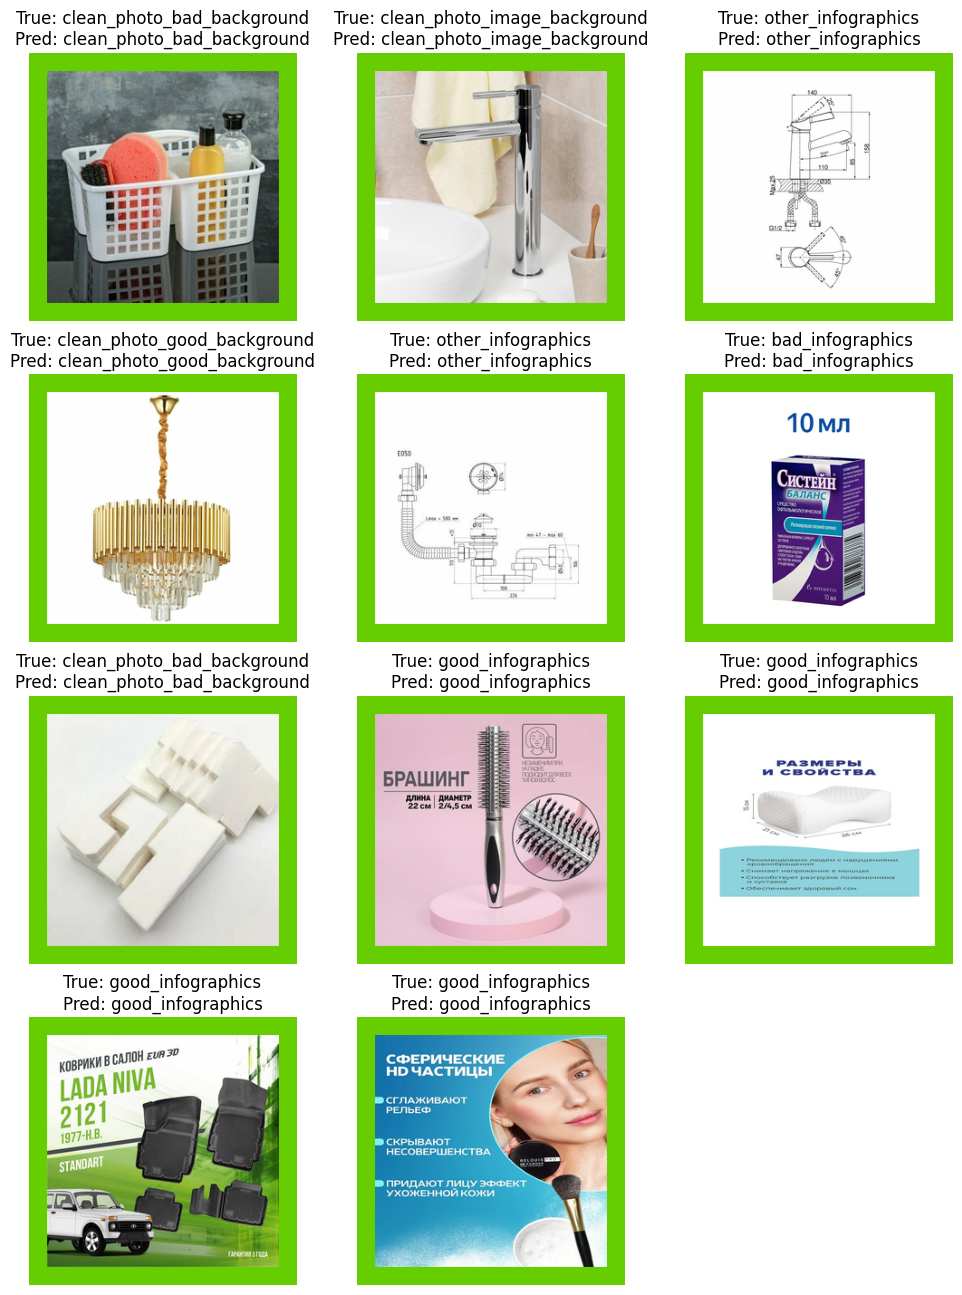